In [1]:
import pystan
import matplotlib.pyplot as plt

In [2]:
model_string = """
data {
  int n;
  int y[n];
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  y ~ bernoulli(theta);
}
"""

In [3]:
y = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
data_list = {'y' : y, 'n' : len(y)}
data_list

{'n': 10, 'y': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]}

In [4]:
# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

In [5]:
# Plotting and summarizing the posterior distribution
print(stan_samples)
stan_samples.plot()

Inference for Stan model: anon_model_f6f19f2978447ffaf66a6d87ed7010fd.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.34  2.5e-3   0.13   0.11   0.24   0.32   0.42   0.61 2857.0    1.0
lp__   -8.16    0.02   0.74 -10.18  -8.33  -7.88  -7.69  -7.64 1504.0    1.0

Samples were drawn using NUTS at Sat Feb 24 22:25:44 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [6]:
## estimate the bias of coin toss using pystan

coin_toss = """
data {
    int<lower=0> n; // number of tosses
    int<lower=0> y; // number of heads
}
transformed data {}
parameters {
    real<lower=0, upper=1> p; // probability of head
}
transformed parameters {}
model {
    p ~ beta(2, 2); // prior
    y ~ binomial(n, p);
}
generated quantities {}
"""



In [7]:
coin_dat = {
             'n': 100,
             'y': 71,
            }

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = coin_toss, data = coin_dat)



In [8]:
%matplotlib inline
%precision 4
plt.style.use('ggplot')

Inference for Stan model: anon_model_ddcd1ea0b344dee001740be231f3134a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p       0.7  9.2e-4   0.05   0.61   0.67    0.7   0.73   0.79 2443.0    1.0
lp__ -63.88    0.02   0.76 -66.04 -64.06 -63.59 -63.41 -63.36 2321.0    1.0

Samples were drawn using NUTS at Sat Feb 24 22:26:10 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


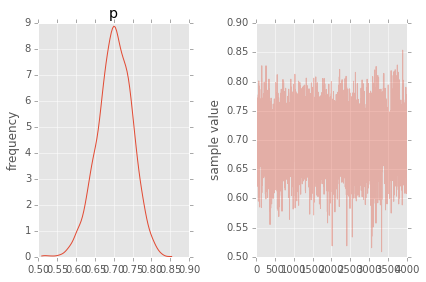

In [9]:
print(stan_samples)
coin_dict = stan_samples.extract()
coin_dict.keys()
stan_samples.plot('p');
plt.tight_layout()